## We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:



* g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series
* s(t): periodic changes (e.g. weekly/yearly seasonality)
* h(t): effects of holidays (user provided) with irregular schedules
* εt: error term accounts for any unusual changes not accommodated by the model

Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique . We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.

### Trend
Trend is modelled by fitting a piece wise linear curve over the trend or the non-periodic part of the time series. The linear fitting exercise ensures that it is least affected by spikes/missing data.

### Saturating growth

An important question to ask here is – Do we expect the target to keep growing/falling for the entire forecast interval?

More often than not, there are cases with non-linear growth with a running maximum capacity. I will illustrate this with an example below.

Let’s say we are trying to forecast number of downloads of an app in a region for the next 12 months. The maximum downloads is always capped by the total number of smartphone users in the region. The number of smartphone users will also, however, increase with time.

With domain knowledge at his/her disposal, an analyst can then define a varying capacity C(t) for the time series forecasts he/she is trying to make.

### Changepoints

Another question to answer is whether my time series encounters any underlying changes in the phenomena e.g. a new product launch, unforeseen calamity etc.  At such points, the growth rate is allowed to change. These changepoints are automatically selected. However, a user can also feed the changepoints manually if it is required. In the below plot, the dotted lines represent the changepoints for the given time series.

As the number of changepoints allowed is increased the fit becomes more flexible. There are basically 2 problems an analyst might face while working with the trend component:

* Overfitting
* Underfitting

A parameter called changepoint_prior_scale could be used to adjust the trend flexibility and tackle the above 2 problems. Higher value will fit a more flexible curve to the time series.

## Seasonality

To fit and forecast the effects of seasonality, prophet relies on fourier series to provide a flexible model. Seasonal effects s(t) are approximated by the following function:

### $s(t)=\sum_{n=1}^{N}\left(a_{n} \cos \left(\frac{2 \pi n t}{P}\right)+b_{n} \sin \left(\frac{2 \pi n t}{P}\right)\right)$



P is the period (365.25 for yearly data and 7 for weekly data)

Parameters [a1, b1, ….., aN, bN] need to be estimated for a given N to model seasonality.

The fourier order N that defines whether high frequency changes are allowed to be modelled is an important parameter to set here. For a time series, if the user believes the high frequency components are just noise and should not be considered for modelling, he/she could set the values of N from to a lower value. If not, N can be tuned to a higher value and set using the forecast accuracy.

## Holidays and events
Holidays and events incur predictable shocks to a time series. For instance, Diwali in India occurs on a different day each year and a large portion of the population buy a lot of new items during this period.

Prophet allows the analyst to provide a custom list of  past and future events. A window around such days are considered separately and additional parameters are fitted to model the effect of holidays and events.

## Prophet Parameters


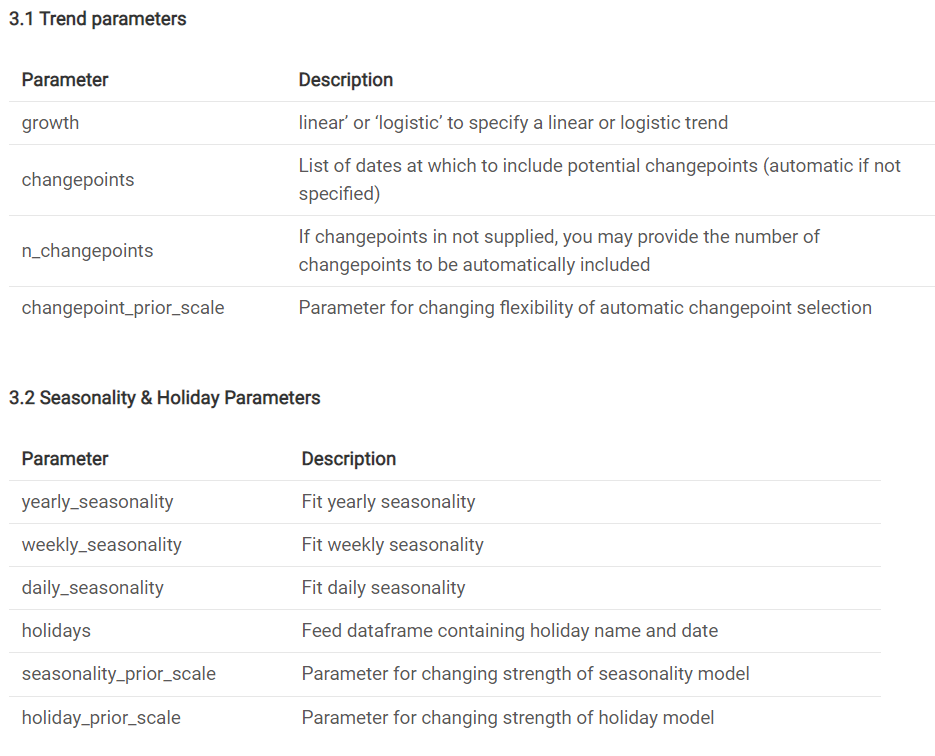

In [0]:
from IPython.display import Image
Image('Capture.PNG', width=800, height=400)

yearly_seasonality, weekly_seasonality & daily_seasonality can take values as True, False and no of fourier terms which was discussed in the last section. If the value is True, default number of fourier terms (10) are taken. Prior scales are defined to tell the model how strongly it needs to consider the seasonal/holiday components while fitting and forecasting.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [0]:
df = pd.read_csv('avocado.csv')
df = df[['Date', 'AveragePrice']].dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

In [0]:

d_df.columns = ['ds', 'y']

m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.274406,1.161496,1.396175
530,2019-03-22,1.276356,1.158200,1.397691
531,2019-03-23,1.278638,1.150673,1.397523
532,2019-03-24,1.281227,1.161636,1.405871
533,2019-03-25,1.284088,1.166223,1.406801


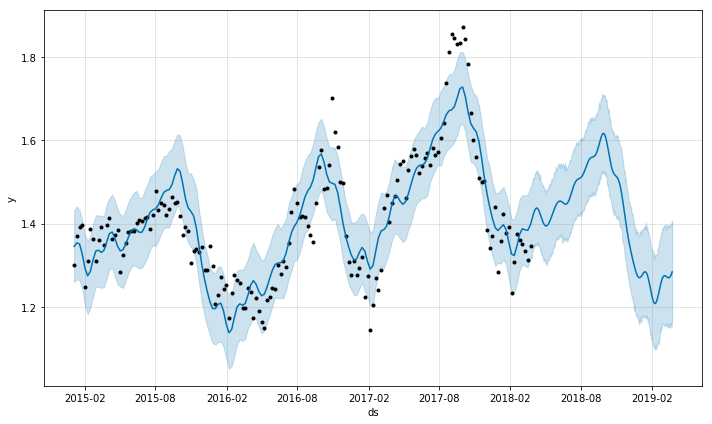

In [0]:

fig1 = m.plot(forecast)

In [0]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 17 forecasts with cutoffs between 2016-01-05 00:00:00 and 2017-12-25 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,0.011640,0.107889,0.081089,0.057278,0.404762
1,10 days,0.010858,0.104202,0.078261,0.055448,0.428571
2,11 days,0.008974,0.094733,0.069973,0.049442,0.523810
3,12 days,0.008868,0.094168,0.069269,0.048493,0.571429
4,13 days,0.010506,0.102500,0.078934,0.056456,0.428571


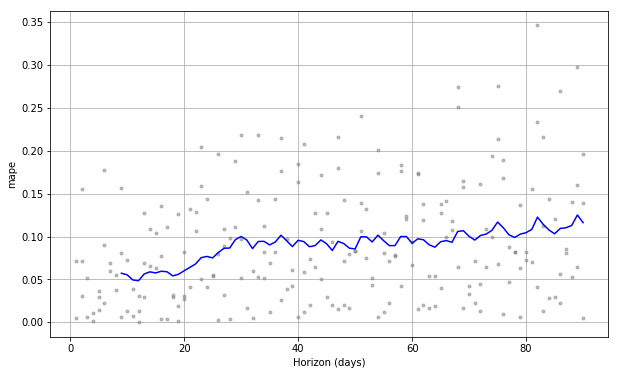

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

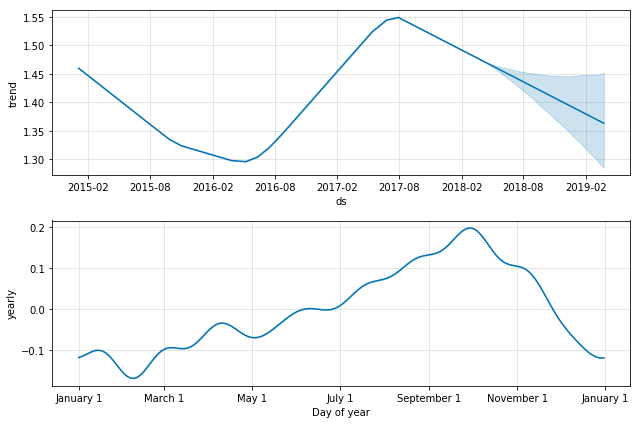

In [0]:
fig4 = m.plot_components(forecast)

https://www.kaggle.com/samuelbelko/predicting-prices-of-avocados

https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons